<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#テンソルの作成" data-toc-modified-id="テンソルの作成-1">テンソルの作成</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#convert_to_tensor" data-toc-modified-id="convert_to_tensor-1.0.1">convert_to_tensor</a></span></li><li><span><a href="#ones" data-toc-modified-id="ones-1.0.2">ones</a></span></li></ul></li><li><span><a href="#テンソルを操作する" data-toc-modified-id="テンソルを操作する-1.1">テンソルを操作する</a></span><ul class="toc-item"><li><span><a href="#キャスト" data-toc-modified-id="キャスト-1.1.1">キャスト</a></span></li><li><span><a href="#転置" data-toc-modified-id="転置-1.1.2">転置</a></span></li><li><span><a href="#形状変更-(reshape)" data-toc-modified-id="形状変更-(reshape)-1.1.3">形状変更 (reshape)</a></span></li><li><span><a href="#不要な次元の削除" data-toc-modified-id="不要な次元の削除-1.1.4">不要な次元の削除</a></span></li></ul></li><li><span><a href="#算術演算" data-toc-modified-id="算術演算-1.2">算術演算</a></span><ul class="toc-item"><li><span><a href="#multiply" data-toc-modified-id="multiply-1.2.1">multiply</a></span></li><li><span><a href="#matmul" data-toc-modified-id="matmul-1.2.2">matmul</a></span></li><li><span><a href="#$L^p$ノルム" data-toc-modified-id="$L^p$ノルム-1.2.3">$L^p$ノルム</a></span></li></ul></li><li><span><a href="#分割・積み上げ・連結" data-toc-modified-id="分割・積み上げ・連結-1.3">分割・積み上げ・連結</a></span><ul class="toc-item"><li><span><a href="#同じサイズでの分割" data-toc-modified-id="同じサイズでの分割-1.3.1">同じサイズでの分割</a></span></li><li><span><a href="#異なるサイズでの分割" data-toc-modified-id="異なるサイズでの分割-1.3.2">異なるサイズでの分割</a></span></li></ul></li></ul></li><li><span><a href="#入力パイプラインの構築" data-toc-modified-id="入力パイプラインの構築-2">入力パイプラインの構築</a></span><ul class="toc-item"><li><span><a href="#Tensorflowのデータセットを既存のテンソルから作成する" data-toc-modified-id="Tensorflowのデータセットを既存のテンソルから作成する-2.1">Tensorflowのデータセットを既存のテンソルから作成する</a></span></li><li><span><a href="#テンソルを一つのデータセットに結合する" data-toc-modified-id="テンソルを一つのデータセットに結合する-2.2">テンソルを一つのデータセットに結合する</a></span></li><li><span><a href="#シャッフル、バッチ、リピート" data-toc-modified-id="シャッフル、バッチ、リピート-2.3">シャッフル、バッチ、リピート</a></span></li></ul></li><li><span><a href="#ニューラルネットワークモデルの構築" data-toc-modified-id="ニューラルネットワークモデルの構築-3">ニューラルネットワークモデルの構築</a></span><ul class="toc-item"><li><span><a href="#線形回帰モデルの構築" data-toc-modified-id="線形回帰モデルの構築-3.1">線形回帰モデルの構築</a></span></li><li><span><a href="#compile-と-fit-を使う" data-toc-modified-id="compile-と-fit-を使う-3.2">compile と fit を使う</a></span></li></ul></li></ul></div>

# テンソルの作成

In [1]:
import tensorflow as tf
import numpy as np

### convert_to_tensor

numpy や python リストをTensorに変換する

In [2]:
np.set_printoptions(precision=3)
a = np.array([1,2,3], dtype=np.int32)
b = [4,5,6]
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


### ones

指定されたshapeの行列（全要素1）を作成する。二次元ベクトルから、テンソルまで作成できる。

In [41]:
t_ones = tf.ones((2,3))

print(t_ones)
print(t_ones.shape)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
(2, 3)


In [46]:
tf.ones((2,3,2))

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]], dtype=float32)>

In [4]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [5]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)
const_tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.2  , 5.   , 3.142], dtype=float32)>

## テンソルを操作する

### キャスト

目的のデータ型に変更できる

In [6]:
t_a_new = tf.cast(t_a, tf.int64)
t_a_new.dtype

tf.int64

### 転置

In [7]:
t = tf.random.uniform(shape=(3,5))
t_tr = tf.transpose(t)
print(t.shape, "---->", t_tr.shape)

(3, 5) ----> (5, 3)


### 形状変更 (reshape)

In [39]:
print("30×1のテンソル（1次元ベクトル）\n")
t = tf.zeros((30,))
print(t)

print("\n 5×6に変更（2次元ベクトル） \n")
t_reshape = tf.reshape(t, shape=(5,6))
print(t_reshape.shape)
print(t_reshape)

30×1のテンソル（1次元ベクトル）

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.], shape=(30,), dtype=float32)

 5×6に変更（2次元ベクトル） 

(5, 6)
tf.Tensor(
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]], shape=(5, 6), dtype=float32)


### 不要な次元の削除

In [40]:
t = tf.zeros((1,2,1,4,1))
print(t)

t_sqz = tf.squeeze(t, axis=(2,4))
print(t.shape, "--->", t_sqz.shape)

tf.Tensor(
[[[[[0.]
    [0.]
    [0.]
    [0.]]]


  [[[0.]
    [0.]
    [0.]
    [0.]]]]], shape=(1, 2, 1, 4, 1), dtype=float32)
(1, 2, 1, 4, 1) ---> (1, 2, 4)


## 算術演算

### multiply

アダマール積（要素ごとの積）を行うには `multiply` を使用する。

In [50]:
tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5,2), minval=-1.0, maxval=1.0)
t2 = tf.random.normal(shape=(5,2), mean=0.0, stddev=1.0)

print(t1, "\n")
print(t2, "\n")

t3 = tf.multiply(t1, t2).numpy()
print(t3)

tf.Tensor(
[[-0.67   0.803]
 [ 0.262 -0.131]
 [-0.416  0.285]
 [ 0.952 -0.13 ]
 [ 0.32   0.21 ]], shape=(5, 2), dtype=float32) 

tf.Tensor(
[[ 0.403 -1.088]
 [-0.063  1.337]
 [ 0.712 -0.489]
 [-0.764 -1.037]
 [-1.252  0.021]], shape=(5, 2), dtype=float32) 

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [11]:
t4 = tf.math.reduce_mean(t1, axis=0)
t4

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.09 , 0.207], dtype=float32)>

### matmul

行列としての積（$A\times B$）を行うには `matmul` を使用する。$A$を転置するか、$B$を転置するかはオプションで渡す。

In [12]:
t5 = tf.linalg.matmul(t1, t2, transpose_b = True)
t5

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-1.144,  1.115, -0.87 , -0.321,  0.856],
       [ 0.248, -0.191,  0.25 , -0.064, -0.331],
       [-0.478,  0.407, -0.436,  0.022,  0.527],
       [ 0.525, -0.234,  0.741, -0.593, -1.194],
       [-0.099,  0.26 ,  0.125, -0.462, -0.396]], dtype=float32)>

In [13]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)
t6

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.711,  0.302],
       [ 0.371, -1.049]], dtype=float32)>

### $L^p$ノルム

一般的なノルムは次のように定義される。

$$
\left( \sum_{i=1}^n x_i^p \right) ^{\frac{1}{p}}
$$

$p=2$ のときのノルムはユークリッド距離を表す。

In [14]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()
norm_t1

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

## 分割・積み上げ・連結

### 同じサイズでの分割

In [15]:
tf.random.set_seed(1)
t = tf.random.uniform((6,))
print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292 0.643]


[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

### 異なるサイズでの分割

In [16]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))
print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=[3,2])
[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292]


[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

In [17]:
A = tf.ones((3,))
B = tf.zeros((2,))
C = tf.concat([A, B], axis=0)

print(C.numpy())

[1. 1. 1. 0. 0.]


In [18]:
A = tf.ones((3,))
B = tf.zeros((3,))
S = tf.stack([A,B], axis=1)

print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


# 入力パイプラインの構築

大規模なデータを扱う際には、データをミニバッチごと（Tensorflowの用語ではバッチ）に前処理を行ってトレーニングに掛ける。
Tensorflowでは、そのときの前処理をパイプラインとして構築するためのクラスが実装されている。

## Tensorflowのデータセットを既存のテンソルから作成する

データが既にテンソルオブジェクト、リスト、NumPy配列として存在している場合、`from_tensor_slices` からデータセットを簡単に作成できる。forループを回せば順番に要素を取り出して、何らかの処理をすることが可能である。

In [19]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)

<TensorSliceDataset shapes: (), types: tf.float32>


In [20]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


また、データが大きすぎる場合などは、それらをミニバッチ単位（TensorFlowの用語的にはバッチ）で切り分けて処理を行う必要が出てくる。そのときには、batch メソッドを使用すればいよい。サイズが3のミニバッチを作成するには `batch` メソッドを使用すれば良い。for ループで回せば、作成したデータセットがバッチに分かれていることが分かる。

`batch`メソッドには `drop_remainder`というオプションがあり、指定したサイズでデータセットが割り切れなかった時にどうするかを規定している。

In [21]:
ds_batch = ds.batch(3)

for i, elem in enumerate(ds_batch):
    print('batch {} : {} '.format(i, elem.numpy()))

batch 0 : [1.2 3.4 7.5] 
batch 1 : [4.1 5.  1. ] 


## テンソルを一つのデータセットに結合する

データ t_x と、クラスラベル t_y が別のテンソルに分かれている場合に、それらを結合する方法を考える。1対1に対応している場合は、`zip`メソッドを使用することで結合できる。

In [52]:
tf.random.set_seed(1)
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

print(t_x, "\n")
print(t_y, "\n")

ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print("x : ", example[0].numpy(), "y : ", example[1].numpy())

tf.Tensor(
[[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]
 [0.605 0.637 0.614]], shape=(4, 3), dtype=float32) 

tf.Tensor([0 1 2 3], shape=(4,), dtype=int32) 

x :  [0.165 0.901 0.631] y :  0
x :  [0.435 0.292 0.643] y :  1
x :  [0.976 0.435 0.66 ] y :  2
x :  [0.605 0.637 0.614] y :  3


もしくは、`from_tensor_slices`メソッドからも直接結合できる。

In [23]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

for example in ds_joint:
    print("x : ", example[0].numpy(), "y : ", example[1].numpy())

x :  [0.165 0.901 0.631] y :  0
x :  [0.435 0.292 0.643] y :  1
x :  [0.976 0.435 0.66 ] y :  2
x :  [0.605 0.637 0.614] y :  3


また結合した上で、標準化などのスケーリング処理を行うには lambda 関数を使えば簡単に実装できる。

In [24]:
ds_trans = ds_joint.map(lambda x, y : (x**2-1.0, y))

for example in ds_trans:
    print("x : ", example[0].numpy(), "y : ", example[1].numpy())

x :  [-0.973 -0.187 -0.602] y :  0
x :  [-0.811 -0.915 -0.587] y :  1
x :  [-0.048 -0.811 -0.564] y :  2
x :  [-0.634 -0.595 -0.622] y :  3


## シャッフル、バッチ、リピート

確率的勾配降下法を使ってNNを訓練するときには、訓練データをランダムにシャッフルしたバッチとして適用することが重要となる。ここではバッチの作成に加えて、データセットのシャッフルとリピートの方法を確認する。

`shuffle`でシャッフルできるが、`buffer_size`オプションが必要。このパラメータで、シャフルの前にサンプリングする要素の個数を決める。

In [59]:
tf.random.set_seed(1)

t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

ds = ds_joint.shuffle(buffer_size=len(t_x))
print(len(t_x))

for example in ds:
    print(example[0].numpy(), example[1].numpy())

4
[0.435 0.292 0.643] 1
[0.976 0.435 0.66 ] 2
[0.605 0.637 0.614] 3
[0.165 0.901 0.631] 0


In [26]:
ds = ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y = next(iter(ds))
print("Batch-x:\n", batch_x.numpy())

Batch-x:
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]


複数のエポックでモデルを訓練するときは、目的のエポックの回数に基づいてデータセットのシャッフルとリピートを行う。
バッチ分割したデータセットのリピートを２回行ってみる。

In [27]:
ds = ds_joint.batch(3).repeat(count=2)

for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [28]:
ds = ds_joint.repeat(count=2).batch(3)

for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


シャッフル、バッチ、リピートは好きな順番で実装することができる。

In [29]:
# シャッフル --> バッチ --> リピート

tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [30]:
# バッチ --> シャッフル -->　リピート

tf.random.set_seed(1)
ds = ds_joint.batch(2).shuffle(4).repeat(3)

for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


# ニューラルネットワークモデルの構築

Kerasは高レベルなニューラルネットワークAPIで、当初はTensorflowやTheanoといったライブラリ上で動作するものとして開発された。TensorFlow2.0ではモデル実装の主要なアプローチとして `tf.keras` が推奨されている。

## 線形回帰モデルの構築

トレーニングデータを作る。

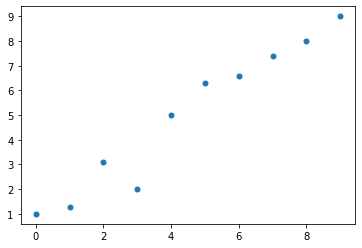

In [31]:
import matplotlib.pyplot as plt

X_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

plt.plot(X_train, y_train, 'o',  markersize=5)
plt.show()

Kerasには予め様々なモデルを作るためのAPIが準備されているが、ここではイチから作成するチュートリアルを行う。

`tf.keras.Model` クラスを継承すると、モデルの調査、訓練、評価にKerasのツールを利用できるようになる。また `call` メソッドを定義することで、出力方法を設定することができる。ここでは $w x + b$ という線形モデルを作成した。

In [32]:
class MyModel(tf.keras.Model):
    def __init__(self):
        
        super(MyModel, self).__init__()
        
        self.w = tf.Variable(0.0, name="weight")
        self.b = tf.Variable(0.0, name="bias")
        
    
    def call(self, x):
        return self.w * x + self.b

In [33]:
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


線形回帰を考えているので、ここでは損失関数として平均二乗誤差を使用する。

$$
E = \frac{1}{2} \sum_{i=1}^n (d_i - y_i )^2
$$

In [60]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

また、確率的勾配降下法を実装するには、勾配を計算する必要がある。ここでは勾配を手動で計算するのではなく、`tf.GradientTape` を利用する。

In [61]:
def train(model, inputs, outputs, learning_rate):
    
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

以下で実際に線形回帰モデルのトレーニングを行う。

- ハイパーパラメータの調整を行う（エポック数、ステップ数、学習率、バッチサイズ、エポック毎のステップ数）
- データの標準化
- 訓練データをミニバッチに分ける
    - ここでは1個ずつ分けているので、単に１イベント毎に損失関数の評価を行う
- `batch` からトレーニングデータと正解ラベルを取り出す
- 損失関数を評価する
- 勾配を計算する

In [62]:
tf.random.set_seed(1)

# -------------
# 各種パラメーター
# -------------
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train)/batch_size))

X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices((tf.cast(X_train_norm, tf.float32), tf.cast(y_train, tf.float32)))

ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws, bs = [], []

for i, batch in enumerate(ds_train):
    
    if i >= steps_per_epoch * num_epochs:
        break
    
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    
    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    
    train(model, bx, by, learning_rate=learning_rate)
    
    if i%log_steps == 0:
        print("Epch {} \t Step {} \t Loss {}".format(int(i/steps_per_epoch), i, loss_val))

Epch 0 	 Step 0 	 Loss 0.04872165620326996
Epch 10 	 Step 100 	 Loss 0.07512705773115158
Epch 20 	 Step 200 	 Loss 0.04810599610209465
Epch 30 	 Step 300 	 Loss 0.04339827597141266
Epch 40 	 Step 400 	 Loss 0.2531695067882538
Epch 50 	 Step 500 	 Loss 0.2528068721294403
Epch 60 	 Step 600 	 Loss 0.07398805767297745
Epch 70 	 Step 700 	 Loss 0.07389107346534729
Epch 80 	 Step 800 	 Loss 0.7393124103546143
Epch 90 	 Step 900 	 Loss 2.420325756072998
Epch 100 	 Step 1000 	 Loss 0.2367057055234909
Epch 110 	 Step 1100 	 Loss 0.1377296894788742
Epch 120 	 Step 1200 	 Loss 0.005547989159822464
Epch 130 	 Step 1300 	 Loss 0.07182279229164124
Epch 140 	 Step 1400 	 Loss 0.04428887367248535
Epch 150 	 Step 1500 	 Loss 0.07331953197717667
Epch 160 	 Step 1600 	 Loss 0.25130346417427063
Epch 170 	 Step 1700 	 Loss 2.4225659370422363
Epch 180 	 Step 1800 	 Loss 0.07200385630130768
Epch 190 	 Step 1900 	 Loss 0.2512064278125763


Final Parameters :  2.6576622 4.8798566


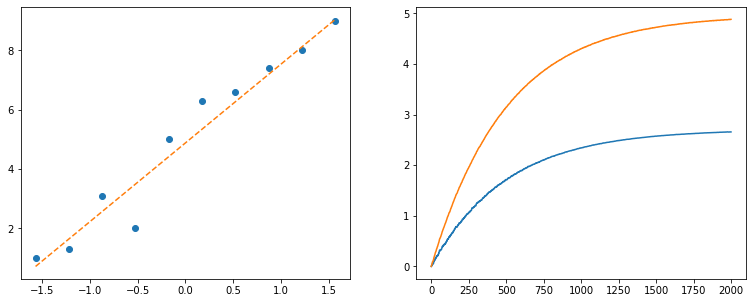

In [36]:
print("Final Parameters : ", model.w.numpy(), model.b.numpy())

X_test = np.linspace(0, 9, num=100).reshape(-1,1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))

fig = plt.figure(figsize=(13, 5))

ax = fig.add_subplot(1,2,1)
ax.plot(X_train_norm, y_train, marker='o', linestyle="")
ax.plot(X_test_norm, y_pred, linestyle="--")

ax = fig.add_subplot(1,2,2)
ax.plot(Ws)
ax.plot(bs)

plt.show()

## compile と fit を使う

In [37]:
tf.random.set_seed(1)
model = MyModel()
model.compile(optimizer="sgd", loss=loss_fn, metrics=["mae", "mse"])

In [38]:
model.fit(X_train_norm, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)